# Task 1

## Question 1: Dataset Description

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [5]:
# Loading the dataset and exploration
df = pd.read_csv("bloodpressure.csv")
df.head() # Examine the first 6 observation of the data frame



,ID-NUMBER,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,SYSTOLIC,IQ,SODIUM,GENDER,MARITAL-STATUS,NAME
0,1,27,2,1,1,120,193,126,118,136,F,M,"Braund, Mr. Owen Harris"
1,2,18,1,0,1,145,210,120,105,137,M,S,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,32,2,0,0,118,196,128,115,135,F,M,"Heikkinen, Miss. Laina"
3,4,24,2,0,1,162,208,129,108,142,M,M,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,19,1,2,0,106,188,119,106,133,F,S,"Allen, Mr. William Henry"


## Question 2: Polynomial Regression

Create polynomial regression models using the whole dataset to predict SYSTOLIC pressure using the ”WEIGHT” feature, for polynomial degrees ranging from 1 to 14. 

Perform 10-fold cross-validation. 

Compute and display the mean RMSEs of the 10-fold cross-validation for each of the 14 polynomial degrees. 

Produce a cross-validation error plot showing the mean RMSE for polynomial degrees from 1 to 14.

In [8]:
# Inspecting the targeted dependent and independent variables
df[["SYSTOLIC","WEIGHT"]]

,SYSTOLIC,WEIGHT
0,126,120
1,120,145
2,128,118
3,129,162
4,119,106
...,...,...
95,142,149
96,163,192
97,151,162
98,147,151


In [9]:
x = df["WEIGHT"].values.reshape(-1,1)
y = df["SYSTOLIC"].values

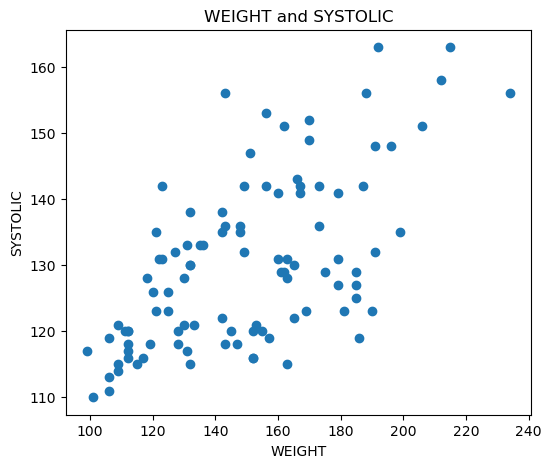

In [10]:
# Visualisation of the data 
plt.figure(figsize = (6,5))
plt.scatter(x, y)
plt.xlabel('WEIGHT')
plt.ylabel('SYSTOLIC')
plt.title('WEIGHT and SYSTOLIC')
plt.show()

Graph explanation:

We can infer from the graph a positive and medium relationship between WEIGHT and SYSTOLIC. As WEIGHT increases, there is also an increase in the level of SYSTOLIC. 

However, the data points get more dispersed as WEIGHT goes up, signifying the increase in variance of the data points is present. The larger the level of WEIGHT, the higher the variance is among the WEIGHT and SYSTOLIC level.

We will now build the Polynomial regression model with level spanning from 1 to 14 using Python's built-in packages such as PolynomialFeautres

In [12]:
# Perform 10-fold cross validation 
m_poly_rmse_scores = []
for i in range(1,14):    
    poly = PolynomialFeatures(degree = i, include_bias = False)
    x_poly= poly.fit_transform(x)
    scores = cross_val_score(LinearRegression(), x_poly, y, scoring = "neg_mean_squared_error", cv = 10)    
    poly_rmse_scores = np.sqrt(-scores) #
    mean_poly_rmse_scores = poly_rmse_scores.mean() #Computing the mean RMSE
    m_poly_rmse_scores.append(mean_poly_rmse_scores)

Text(0.5, 1.0, 'Cross-validation error plot')

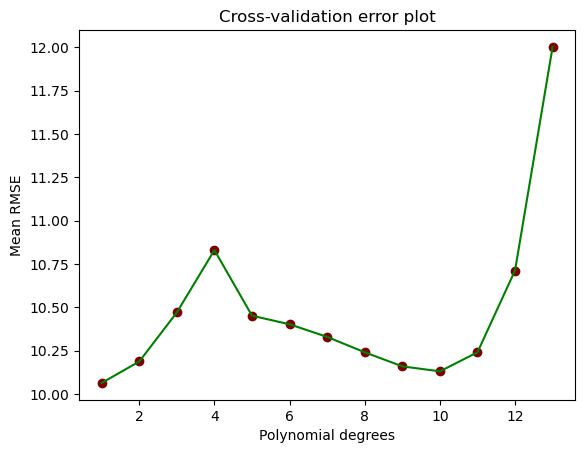

In [13]:
line = [*range(1,14)]
plt.scatter(line, m_poly_rmse_scores, c= 'maroon')
plt.plot(line, m_poly_rmse_scores, c = 'green')
plt.xlabel('Polynomial degrees')
plt.ylabel('Mean RMSE')
plt.title('Cross-validation error plot')

In [14]:
print('Mean RMSE: {}'.format(m_poly_rmse_scores))

Mean RMSE: [10.063566348213604, 10.187166706053542, 10.470321681840364, 10.829963377150463, 10.45133716702582, 10.4018597256369, 10.329004499108617, 10.240305476454346, 10.159177954821084, 10.130294263447153, 10.240212879403142, 10.712133802678924, 12.002013373747856]


## Question 3: Model Selection

According to the cross validation plot demonstrating the polynomial degrees and the Mean RMSE, it can be observed that the best degree for the polynomial model is 2, since it is the polynomial model that generates the second lowest mean RMSE value with the value at 10.159177926191273. Even though the model at degree 10 is generate the lowest mean RMSE, but the model may be overfit due to selecting large degrees. Furthermore, degree 2 demonstrates that the actual values deviates from the predicted values by a substantially low margin in the tested polynomial degrees. It also indicates that it is the most suitable to predict the result with the lowest error rate.

In [17]:
poly = PolynomialFeatures(degree = 2, include_bias = False)
x_poly= poly.fit_transform(x)
lin_reg_model = LinearRegression().fit(x_poly,y)
print("Polynomial model Coefficient: {}".format(lin_reg_model.coef_)) # Print the coefficient of the model
print("Polynomial model Intercept: {}".format(lin_reg_model.intercept_)) # Print the intercept of the model

Polynomial model Coefficient: [0.15125235 0.00037347]
Polynomial model Intercept: 98.911250919365


## Question 4: Multiple Linear Regression

We can see that all of the features are relevant to build a linear regression model except for ID and NAME, columns that don't provide meaningful data or have any correlation to SYSTOLIC level. We are going to leave those two columns out.

In [20]:
x = df[['AGE','ED-LEVEL','SMOKING STATUS','EXERCISE','WEIGHT','SERUM-CHOL','IQ','SODIUM','GENDER','MARITAL-STATUS']]
x

,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,IQ,SODIUM,GENDER,MARITAL-STATUS
0,27,2,1,1,120,193,118,136,F,M
1,18,1,0,1,145,210,105,137,M,S
2,32,2,0,0,118,196,115,135,F,M
3,24,2,0,1,162,208,108,142,M,M
4,19,1,2,0,106,188,106,133,F,S
...,...,...,...,...,...,...,...,...,...,...
95,53,0,0,0,149,232,103,141,F,M
96,63,0,1,0,192,193,95,147,M,M
97,74,1,0,0,162,247,99,151,F,W
98,35,2,0,1,151,251,113,145,F,M


In [21]:
x['GENDER'] = x['GENDER'].replace(['M','F'],[1,2])
x['MARITAL-STATUS'] = x['MARITAL-STATUS'].replace(['D','M','S','W'],[1,2,3,4])
x = x.values
y = df[['SYSTOLIC']].values

/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2845/2712510612.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x['GENDER'] = x['GENDER'].replace(['M','F'],[1,2])
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2845/2712510612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['GENDER'] = x['GENDER'].replace(['M','F'],[1,2])
/var/folders/px/rpgbb1vs07g7l4_2lymxg5qc0000gn/T/ipykernel_2845/2712510612.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a

In [22]:
x

array([[ 27,   2,   1,   1, 120, 193, 118, 136,   2,   2],
       [ 18,   1,   0,   1, 145, 210, 105, 137,   1,   3],
       [ 32,   2,   0,   0, 118, 196, 115, 135,   2,   2],
       [ 24,   2,   0,   1, 162, 208, 108, 142,   1,   2],
       [ 19,   1,   2,   0, 106, 188, 106, 133,   2,   3],
       [ 56,   1,   0,   0, 143, 206, 111, 138,   2,   4],
       [ 65,   1,   2,   0, 160, 240,  99, 140,   1,   4],
       [ 36,   2,   1,   0, 215, 215, 106, 151,   1,   1],
       [ 43,   1,   0,   1, 127, 201, 111, 134,   2,   2],
       [ 47,   1,   1,   1, 132, 215, 109, 135,   2,   1],
       [ 48,   3,   1,   2, 196, 199, 115, 146,   1,   1],
       [ 25,   2,   2,   3, 109, 210, 114, 141,   2,   3],
       [ 63,   0,   1,   0, 170, 242, 101, 152,   2,   1],
       [ 37,   2,   0,   3, 187, 193, 109, 144,   1,   2],
       [ 40,   0,   1,   1, 234, 208,  98, 147,   1,   2],
       [ 25,   1,   2,   1, 199, 253, 103, 148,   1,   3],
       [ 72,   0,   0,   0, 143, 288, 103, 145,   2,   2

Now that the data pre-processing steps have been done, we will build a Multiple Linear Regression

In [24]:
lin_model = LinearRegression().fit(x, y)
print('Multi-linear model Coefficient: {}'.format(lin_model.coef_))
print('Multi-linear model Intercept: {}'.format(lin_model.intercept_))

Multi-linear model Coefficient: [[ 0.33056784 -0.87090274 -0.08753526 -0.07509179  0.30396451  0.01745461
  -0.04049222  0.06966721 10.95029683 -1.09102542]]
Multi-linear model Intercept: [50.3590063]


**Perform 10 fold cross validation on the multiple linear regression**

In [26]:
# 10 fold Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
multi_lin_scores = cross_val_score(LinearRegression(),x,y, scoring = "neg_mean_squared_error", cv = 10)
multi_lin_rmse_scores = np.sqrt(-multi_lin_scores) 
mean_multi_lin_rmse_scores = np.mean(multi_lin_rmse_scores)
print("RMSE: {}".format(multi_lin_rmse_scores))
print('Mean RMSE: {}'.format(mean_multi_lin_rmse_scores))


RMSE: [8.32114789 7.55446484 8.58877345 5.94879844 7.51700528 7.26700244
 6.06383438 8.86175363 7.84214218 7.57693122]
Mean RMSE: 7.55418537659728


## Question 5

Build a ridge regression model of the above (i.e. item 4) using α = 0.1. Print its coefficients. 
Perform 10-fold cross validation. 
Calculate its square roots of the mean square errors (RMSE), and the mean RMSE, and display the mean RMSE.


In [29]:
from sklearn.linear_model import Ridge

In [30]:
ridge_model = Ridge(alpha = 0.1)
ridge_model = ridge_model.fit(x,y)
print("Ridge Model Coefficient: {}".format(ridge_model.coef_))
print("Ridge Model Intercept: {}".format(ridge_model.intercept_))

Ridge Model Coefficient: [[ 0.33183712 -0.87329823 -0.08645678 -0.08344129  0.30214144  0.01745305
  -0.04027576  0.07087436 10.83667682 -1.09241833]]
Ridge Model Intercept: [50.57634328]


**Build a 10 fold cross validation with Ridge Model**

In [32]:
ridge_cross_val = cross_val_score(ridge_model,x,y,scoring = 'neg_mean_squared_error', cv=10)
ridge_rmse_scores = np.sqrt(-ridge_cross_val)
mean_ridge_rmse_scores = np.mean(ridge_rmse_scores)
print("RMSE: {}".format(ridge_rmse_scores))
print("Mean RMSE: {}".format(mean_ridge_rmse_scores))

RMSE: [8.3382567  7.56784831 8.58048433 5.94191182 7.48934397 7.26350031
 6.05626059 8.86595721 7.85123569 7.57849498]
Mean RMSE: 7.5533293928264245


## Question 6

Select the best model of the three, and explains why briefly

We have the summary of the mean RMSE of different models below:

- Polynomial Regression Model: 10.187166706053542
- Multiple Linear Regression Model: 7.554185376597282
- Ridge Regression Model: 7.553329392826422

It can be seen that the best model is the Ridge regression Model with alpha 0.1 for the lowest mean Root Mean Squared Error value among all three models. This also indicatess that its predicted values deviate by an unsubstantial margin away from the actual values, which allows the model to make target value prediction with much higher reliability and accuracy than other models.



# Task 2

## MNIST Digit Classification using PCA and Logistic Regression

- Load the renowned MNIST (’mnist 784’) dataset, which consists of a large collection of handwritten digit images. Your task is to reduce the number of features first, and then build a binary classification model to **distinguish between the digit “7” and all other digits (not “7”)**.

- Perform Principal Component Analysis (PCA) on the feature data to reduce its dimensionality while **retaining 90% of the overall explained variance**.

- Split the data into training and testing sets, using a common split ratio of **80% for training and 20% for testing**.

- Create a **Logistic Regression model** using the reduced feature dataset. Use this model to **predict the labels for both the training and testing dataset**. 

- Print the **number of principal components preserved**. Print the prediction accuracy (proportion of correct predictions) of your model on the training set. Also, print the prediction accuracy, the confusion matrix, and the misclassified digits (i.e. wrong predicitons) of your model on the testing set.

- **Evaluate the model**: What do you think of the model generated (good, underfitting, overfitting)? Briefly explain your reasoning.

## Question 1:

First, we will load all the libraries and packages that will help us complete the following tasks:
- MNIST dataset
- Principal Component Analysis
- Divide the dataset into training and testing sets
- Build a Logistic Regression Model
- Confusion Matrix

In [41]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [42]:
# Loading the MNIST dataset
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)


In [43]:
mnist.target = mnist.target.astype(np.uint8)

In [44]:
x_7 = mnist['data'] #
y_7 = mnist['target']

## Question 2

The objective is to fit the MNIST data to the PCA to find the ultimate number of dimension that can satisfy our requirement of preserving 90% of the variance in the data.

In [47]:
pca = PCA()
pca = pca.fit(x_7)


In [48]:
# Find the number of dimension that retian 90% of the overall explained variance
variance = np.cumsum(pca.explained_variance_ratio_)
num_dimension = np.argmax(variance >= 0.9) + 1 #Plus 1 because the np.argmax return the index

# Fit the new PCA to obtain x_reduced in lower dimension
pca = PCA(n_components = num_dimension)
x_reduced = pca.fit_transform(x_7)

In [49]:
print(x_7.shape)
print(x_reduced.shape) #reduced in number of dimensions/features, from 784 to 74
print('Number of principal components preserved: {}'.format(num_dimension))

(70000, 784)
(70000, 87)
Number of principal components preserved: 87


It can be seen that the number of reduced dimension that can retain 90% of the explained variance is 87, meaning that the PCA was able to reduce a significant amount of dimension (from 784 to 87) but still able to preserve data's explainability. 

## Question 3

# Dividing the reduced data
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y_7, test_size=0.2, random_state=42)

## Question 4

In [54]:
# Create new variables that will only predict number 7
y_train1 = y_train == 7
y_test1 = y_test == 7

NameError: name 'y_train' is not defined

In [ ]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train, y_train1) # fit the training set into the Logistic Regression model

## Question 5

**Predict the language for the training set and testing set**

In [ ]:
y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

## Question 6

Print the number of principal components preserved. Print the prediction accuracy (proportion of correct predictions) of your model on the training set. Print the prediction accuracy, the confusion matrix, and the misclassified digits (i.e. wrn g predtiitons) of your model on the testing set.

**Number of Principal Components preserved**

In [ ]:
print('Number of principal components preserved: {}'.format(num_dimension)) 

**Prediction accuracy**

In [ ]:
# Accuracy of prediction conducted on the training set
accuracy_train = accuracy_score(y_train1, y_train_pred)
print("Accuracy: {}".format(accuracy_train*100), "%") 

In [ ]:
# Accuracy of prediction conducted on the testing set
accuracy_test = accuracy_score(y_test1, y_test_pred)
print("Accuracy: {}".format(accuracy_test*100), "%") 

**Confusion Matrix**

In [ ]:
# Confusion matrix on the training set
confusion_matrix(y_train1, y_train_pred)

The confusion matrix on the training set shows that:
- 314 values being misclassified as number 7 while they are not.
- 547 values being misclassified as not number 7 while they are 7 (Type I error).
- 49896 values being correctly classified as number 7 while they are truly 7.
- 5243 values being correctly classified as not number 7.

In [ ]:
# Confusion matrix on the testing set
confusion_matrix(y_test1, y_test_pred)

The confusion matrix on the training set shows that:
- 86 values being misclassified as number 7 while they are not.
- 131 values being misclassified as not number 7 while they are 7 (Type I error).
- 12411 values being correctly classified as number 7 while they are truly 7.
- 1372 values being correctly classified as not number 7.

**Misclassified digits**

In [ ]:
misclass = np.where(y_test1 != y_test_pred)[0]
y_test[misclass]

## Question 7

Evaluate the model: What do you think of the model generated (good, underfitting, overfitting)? Briefly explain your reasoning

According to the result above, it is safe to say that the model performs very well when it comes to predicting the number with accuracy sitting around 98.46% for the training set and 98.45% for the testing set good. With such impressive accuracy, the model can be used for predicting tasks with high precision confidence. In addition, we have used PCA to reduce the number of dimensions, and it was able to retrain 90% of the explained variance, ensuring the model is reduced to a rather adequate complexity level and it is not overfitted.